##### 6.5 Machine Learning Part 2

##### This script contains the following:
##### 1. Importing libraries and data and renaming columns
##### 2. The elbow technique
##### 3. k-means clustering

##### 1. Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
data = pd.read_pickle('/Users/shaqurcasco/Downloads/Cf_Acheivement6/script 6.1/df_clean_6.3.pkl')

In [3]:
pwd

'/Users/shaqurcasco/Downloads/Cf_Acheivement6/script 6.1'

In [5]:
data.shape

(2720, 15)

In [20]:
data.head()

,Order Date,Ship Mode,Customer ID,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit_Range
0,01-01-20,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,East,Furniture,Furnishings,48.896,4,0.2,8.5568,Low_Profit
2,01-01-20,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,Central,Office Supplies,Binders,3.600,2,0.0,1.7280,Low_Profit
4,01-01-20,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,Central,Furniture,Furnishings,141.420,5,0.6,187.3815,Medium_profit
6,01-01-20,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,Central,Office Supplies,Art,12.736,4,0.2,2.2288,Low_Profit
7,01-01-20,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,Central,Office Supplies,Binders,6.470,5,0.8,9.7050,Low_Profit


In [6]:
data.columns

Index(['Order Date', 'Ship Mode', 'Customer ID', 'Segment', 'Country', 'City',
       'State', 'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Profit_Range'],
      dtype='object')

In [7]:
#creating the subset for the clustering 
df= data[['Sales', 'Quantity','Discount', 'Profit']]

In [23]:
df.head()

,Sales,Quantity,Discount,Profit
0,48.896,4,0.2,8.5568
2,3.600,2,0.0,1.7280
4,141.420,5,0.6,187.3815
6,12.736,4,0.2,2.2288
7,6.470,5,0.8,9.7050


##### 2. The elbow technique

In [8]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [9]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/shaqurcasco/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/shaqurcasco/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/shaqurcasco/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/shaqurcasco/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of

[-16681885.645321423,
 -4632198.671544901,
 -2598283.221079839,
 -1975732.4792665537,
 -1627078.8318093547,
 -1324684.4128764314,
 -1081844.958780697,
 -942909.7021714498,
 -837460.7664117501]

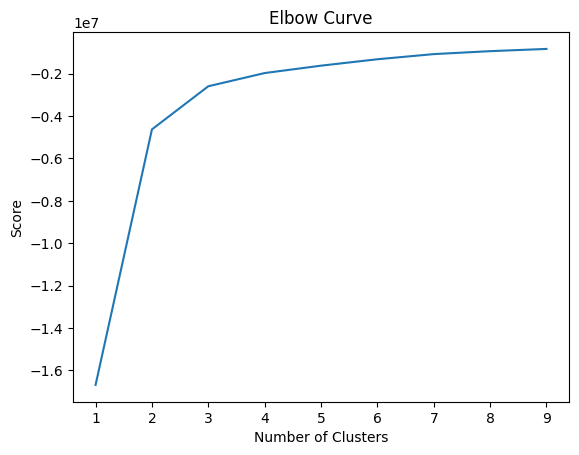

In [10]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

##### From the Elbow Curve, on the x-axis the number of clusters moved from 2 to 3, afterward the curve is flatten out. the optimal count for the clusters is 3

##### 3. k-means clustering

In [11]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 


In [12]:
# Fit the k-means object to the data.

kmeans.fit(df)

/Users/shaqurcasco/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [13]:
df['clusters'] = kmeans.fit_predict(df)

/Users/shaqurcasco/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9f/n36r4f3s7qsf6wgq534gqhbh0000gn/T/ipykernel_35747/1645658811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clusters'] = kmeans.fit_predict(df)


In [14]:
df.head()

,Sales,Quantity,Discount,Profit,clusters
0,48.896,4,0.2,8.5568,0
2,3.600,2,0.0,1.7280,0
4,141.420,5,0.6,187.3815,1
6,12.736,4,0.2,2.2288,0
7,6.470,5,0.8,9.7050,0


In [15]:
df.to_csv('/Users/shaqurcasco/Downloads/Cf_Acheivement6/prepared data 6.1/df_clusterdata.csv')

In [32]:
df['clusters'].value_counts()

clusters
0    1727
2     606
1     387
Name: count, dtype: int64

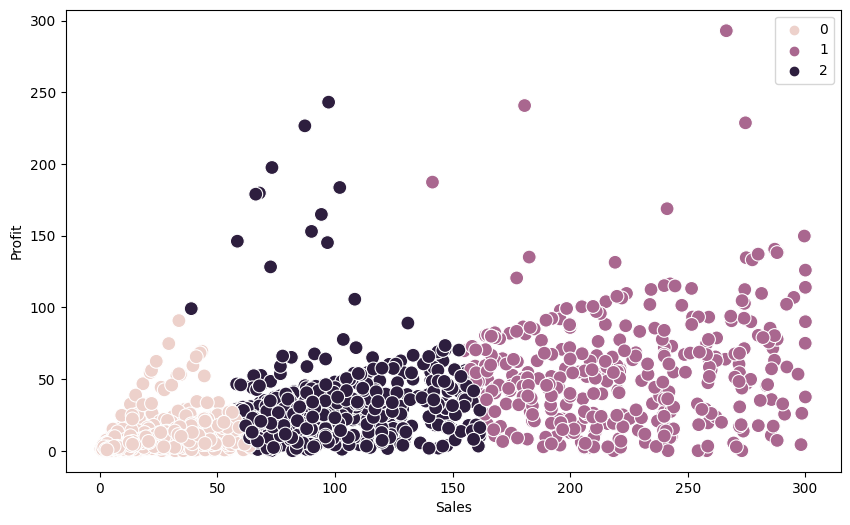

<Figure size 640x480 with 0 Axes>

In [51]:
# Plot the clusters for the "Profit" and "sales" variables.

plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=df['Sales'], y=df['Profit'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Sales') # Label x-axis.
plt.ylabel('Profit') # Label y-axis.
plt.show()

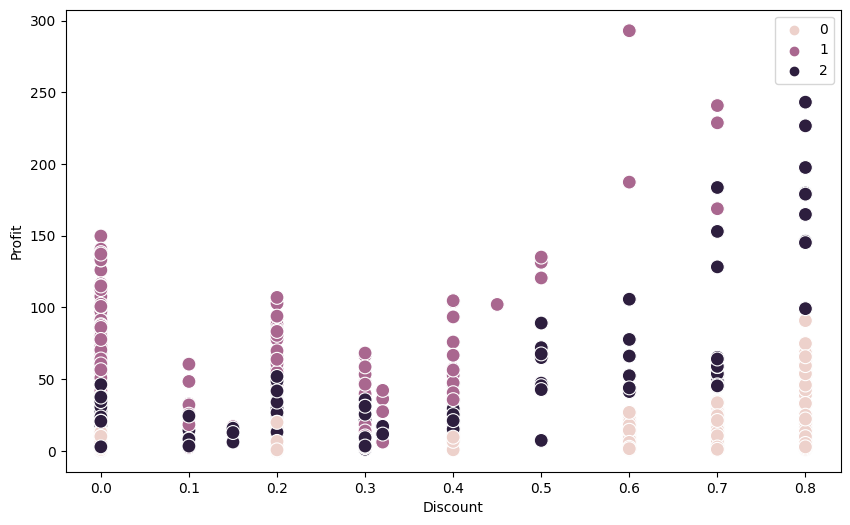

<Figure size 640x480 with 0 Axes>

In [48]:
# Plot the clusters for the "Discount" and "Profit" variables.

plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=df['Discount'], y=df['Profit'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Discount') 
plt.ylabel('Profit') 
plt.show()

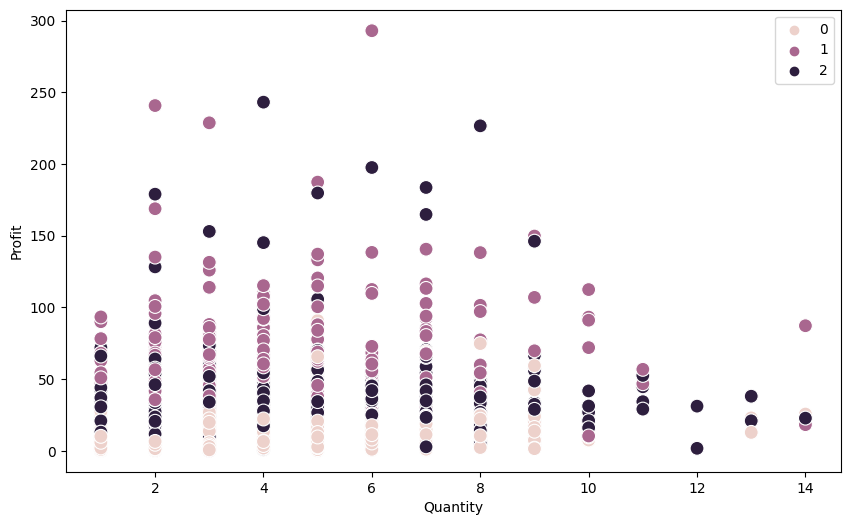

<Figure size 640x480 with 0 Axes>

In [49]:
# Plot the clusters for the "Quantity" and "Profit" variables.

plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=df['Quantity'], y=df['Profit'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Quantity') 
plt.ylabel('Profit') 
plt.show()

In [41]:
# creating a variable for the cluster color 'cluster'
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

/var/folders/9f/n36r4f3s7qsf6wgq534gqhbh0000gn/T/ipykernel_99248/4155924145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'


In [42]:
# grouping the cluster 
df.groupby('cluster').agg({'Sales':['mean', 'median'], 
                         'Quantity':['mean', 'median'], 
                         'Discount':['mean', 'median'],
                          'Profit':['mean', 'median']})

Sales           Quantity         Discount            Profit  \
                   mean   median      mean median      mean median       mean   
cluster                                                                         
dark purple   98.727626   93.142  4.031353    3.0  0.133977    0.0  29.841263   
pink          21.949467   17.920  3.306891    3.0  0.175159    0.2   8.188622   
purple       221.259163  218.352  3.912145    3.0  0.116098    0.0  54.495713   

                      
              median  
cluster               
dark purple  25.9842  
pink          6.0726  
purple       50.8254

###### Sales: Cluster "purple" has the highest mean and median sales (221.26 and 218.35, respectively), indicating that this cluster contains the highest-selling products on average. Cluster "pink" has the lowest mean and median sales (21.95 and 17.92, respectively), representing products with lower sales volumes.

###### Quantity: All clusters have similar median quantities (around 3.00), but cluster "dark purple" has the highest mean quantity (4.03). This suggests that cluster "dark purple" has products with higher average quantities sold compared to the other clusters.

###### Discount: Cluster "pink" has the highest mean discount (0.2) compared to the other clusters, indicating that products in this cluster are more frequently offered at a discount.

###### Profit: Cluster "purple" has the highest mean and median profit (54.50 and 50.83, respectively), suggesting that products in this cluster are more profitable on average. Cluster "dark purple" also shows relatively high mean and median profits (29.84 and 25.98, respectively).

###### Overall, the analysis provides insights into the characteristics of each cluster. For example, cluster "purple" contains high-selling and highly profitable products, while cluster "pink" consists of products with lower sales and slightly higher discounts. Cluster "dark purple" has moderate sales and profits, with relatively higher quantities sold per product. 
